###  Time Lagged Cross Correlation

<p>
   Time lagged cross correlation (TLCC) can identify directionality between two signals such as a leader-follower relationship in which the leader initiates a response which is repeated by the follower. There are couple ways to do investigate such relationship including Granger causality, used in Economics, but note that these still do not necessarily reflect true causality. Nonetheless we can still extract a sense of which signal occurs first by looking at cross correlations. 
    
    
</p>   

<p>TLCC is measured by incrementally shifting one time series vector and repeatedly calculating the correlation between two signals. If the peak correlation is at the center (offset=0), this indicates the two time series are most synchronized at that time. However, the peak correlation may be at a different offset if one signal leads another. The code below implements a cross correlation function using pandas functionality. It can also wrap the data so that the correlation values on the edges are still calculated by adding the data from the other side of the signal.</p>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import datetime
import geopandas as gpd
import folium
import time
import my_code
warnings.filterwarnings('ignore')

import seaborn as sns

In [2]:
data = pd.read_csv('/Users/alket/desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)
agg_by_cell_day = data.groupby(by = ['date','cell_num'])
agg_by_cell = data.groupby(by = ['cell_num'])

In [3]:
dict2data = {}
count = 0
for i,k in agg_by_cell_day:
    count +=1
    if count >221: break
    dict2data[i] = k
    print(k)

             date  cell_num  nr_people  hours  minutes
0      2017-04-16  486-1252       36.0    0.0      0.0
221    2017-04-16  486-1252       36.0    0.0     15.0
442    2017-04-16  486-1252       34.0    0.0     30.0
663    2017-04-16  486-1252       33.0    0.0     45.0
884    2017-04-16  486-1252       32.0    1.0      0.0
...           ...       ...        ...    ...      ...
20111  2017-04-16  486-1252       35.0   22.0     45.0
20332  2017-04-16  486-1252       33.0   23.0      0.0
20553  2017-04-16  486-1252       32.0   23.0     15.0
20774  2017-04-16  486-1252       32.0   23.0     30.0
20995  2017-04-16  486-1252       32.0   23.0     45.0

[96 rows x 5 columns]
             date  cell_num  nr_people  hours  minutes
1      2017-04-16  486-1253       39.0    0.0      0.0
222    2017-04-16  486-1253       38.0    0.0     15.0
443    2017-04-16  486-1253       36.0    0.0     30.0
664    2017-04-16  486-1253       35.0    0.0     45.0
885    2017-04-16  486-1253       34.0    

[96 rows x 5 columns]
             date  cell_num  nr_people  hours  minutes
50     2017-04-16  488-1268      159.0    0.0      0.0
271    2017-04-16  488-1268      160.0    0.0     15.0
492    2017-04-16  488-1268      158.0    0.0     30.0
713    2017-04-16  488-1268      156.0    0.0     45.0
934    2017-04-16  488-1268      157.0    1.0      0.0
...           ...       ...        ...    ...      ...
20161  2017-04-16  488-1268      143.0   22.0     45.0
20382  2017-04-16  488-1268      145.0   23.0      0.0
20603  2017-04-16  488-1268      145.0   23.0     15.0
20824  2017-04-16  488-1268      147.0   23.0     30.0
21045  2017-04-16  488-1268      147.0   23.0     45.0

[96 rows x 5 columns]
             date  cell_num  nr_people  hours  minutes
51     2017-04-16  489-1252      320.0    0.0      0.0
272    2017-04-16  489-1252      315.0    0.0     15.0
493    2017-04-16  489-1252      296.0    0.0     30.0
714    2017-04-16  489-1252      289.0    0.0     45.0
935    2017-04-16  4

[96 rows x 5 columns]
             date  cell_num  nr_people  hours  minutes
106    2017-04-16  492-1256      224.0    0.0      0.0
327    2017-04-16  492-1256      219.0    0.0     15.0
548    2017-04-16  492-1256      207.0    0.0     30.0
769    2017-04-16  492-1256      201.0    0.0     45.0
990    2017-04-16  492-1256      195.0    1.0      0.0
...           ...       ...        ...    ...      ...
20217  2017-04-16  492-1256      215.0   22.0     45.0
20438  2017-04-16  492-1256      205.0   23.0      0.0
20659  2017-04-16  492-1256      197.0   23.0     15.0
20880  2017-04-16  492-1256      196.0   23.0     30.0
21101  2017-04-16  492-1256      196.0   23.0     45.0

[96 rows x 5 columns]
             date  cell_num  nr_people  hours  minutes
107    2017-04-16  492-1257      145.0    0.0      0.0
328    2017-04-16  492-1257      139.0    0.0     15.0
549    2017-04-16  492-1257      134.0    0.0     30.0
770    2017-04-16  492-1257      129.0    0.0     45.0
991    2017-04-16  4

[96 rows x 5 columns]
             date  cell_num  nr_people  hours  minutes
160    2017-04-16  495-1259      170.0    0.0      0.0
381    2017-04-16  495-1259      166.0    0.0     15.0
602    2017-04-16  495-1259      163.0    0.0     30.0
823    2017-04-16  495-1259      164.0    0.0     45.0
1044   2017-04-16  495-1259      165.0    1.0      0.0
...           ...       ...        ...    ...      ...
20271  2017-04-16  495-1259      154.0   22.0     45.0
20492  2017-04-16  495-1259      155.0   23.0      0.0
20713  2017-04-16  495-1259      154.0   23.0     15.0
20934  2017-04-16  495-1259      152.0   23.0     30.0
21155  2017-04-16  495-1259      152.0   23.0     45.0

[96 rows x 5 columns]
             date  cell_num  nr_people  hours  minutes
161    2017-04-16  495-1260      174.0    0.0      0.0
382    2017-04-16  495-1260      173.0    0.0     15.0
603    2017-04-16  495-1260      172.0    0.0     30.0
824    2017-04-16  495-1260      171.0    0.0     45.0
1045   2017-04-16  4

[96 rows x 5 columns]
             date  cell_num  nr_people  hours  minutes
215    2017-04-16  498-1263       17.0    0.0      0.0
436    2017-04-16  498-1263       17.0    0.0     15.0
657    2017-04-16  498-1263       17.0    0.0     30.0
878    2017-04-16  498-1263       16.0    0.0     45.0
1099   2017-04-16  498-1263       16.0    1.0      0.0
...           ...       ...        ...    ...      ...
20326  2017-04-16  498-1263       16.0   22.0     45.0
20547  2017-04-16  498-1263       16.0   23.0      0.0
20768  2017-04-16  498-1263       16.0   23.0     15.0
20989  2017-04-16  498-1263       16.0   23.0     30.0
21210  2017-04-16  498-1263       16.0   23.0     45.0

[96 rows x 5 columns]
             date  cell_num  nr_people  hours  minutes
216    2017-04-16  498-1264       17.0    0.0      0.0
437    2017-04-16  498-1264       17.0    0.0     15.0
658    2017-04-16  498-1264       16.0    0.0     30.0
879    2017-04-16  498-1264       16.0    0.0     45.0
1100   2017-04-16  4

In [4]:
c1 = dict2data['2017-04-16','498-1259']['nr_people']
c2 = dict2data['2017-04-16','498-1258']['nr_people']

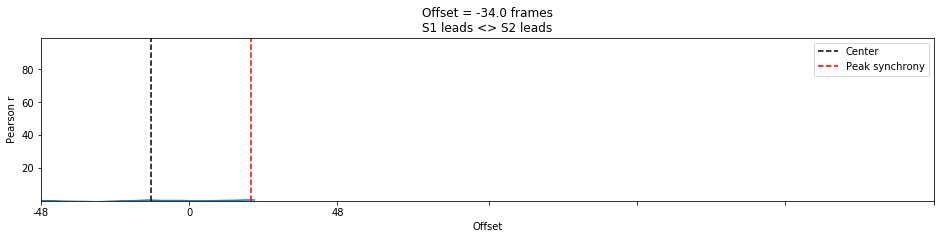

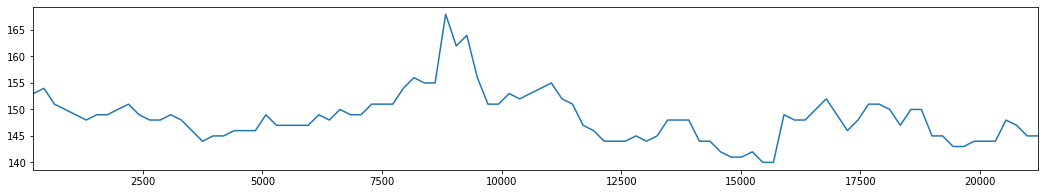

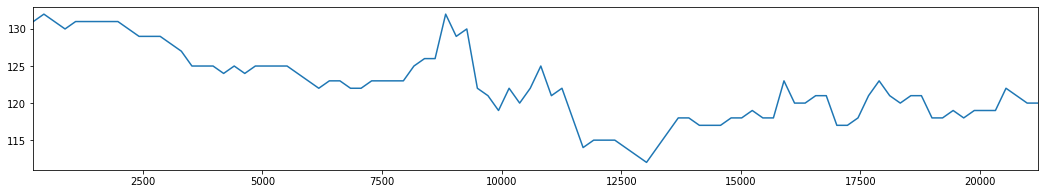

In [5]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))



d1 = c1.reset_index(drop=True)
d2 = c2.reset_index(drop=True)
seconds = 3
fps = 12
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(16,3))

ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[0.1,99.0],xlim=[0,95],
       xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-48, 0, 48]);

plt.legend()
plt.show()


plt.figure(figsize = (18, 3))
c1.plot()
plt.show()
plt.figure(figsize = (18, 3))
c2.plot()
plt.show()

In [6]:
crosscorr(d1,d2, 4)


0.3012498886423124

offset  4.0


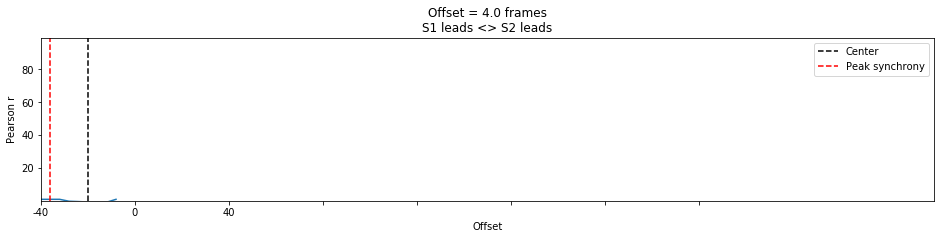

In [7]:
d1 = pd.Series([10, 20, 30, 40, 50, 60], index =['0', '1', '2', '3', '4', '5'])
d2 = pd.Series([50, 60, 10, 20, 30, 40], index =['0', '1', '2', '3', '4', '5'])
seconds = 1
fps = 4
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]

offset = np.ceil(len(rs)/2)-np.argmax(rs)
print('offset ', offset)
f,ax=plt.subplots(figsize=(16,3))

ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[0.1,99.0],xlim=[0,95],
       xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70])
ax.set_xticklabels([-40, 0, 40]);

plt.legend()
plt.show()

In [8]:
crosscorr(d1,d2, 4)

0.9999999999999999